In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from src import *
from scipy.io import wavfile
import IPython

In [63]:
def generate_wave(frequency=440, sr=44100, length=2, function=np.sin):
    t = np.linspace(0, length, sr * length, endpoint=False)
    y = function(frequency * 2 * np.pi * t)
    return y, t

In [64]:
n_fft = 1024
hop_length = 512

spectrogram = torchaudio.transforms.Spectrogram(n_fft=n_fft, hop_length=hop_length)

In [69]:
sr = 22050
y1, t1 = generate_wave(frequency=440, sr=sr, function=np.sin)
y2, t2 = generate_wave(frequency=880, sr=sr, function=np.cos)

tensor = torch.tensor(y1 + y2)
features = spectrogram(tensor)

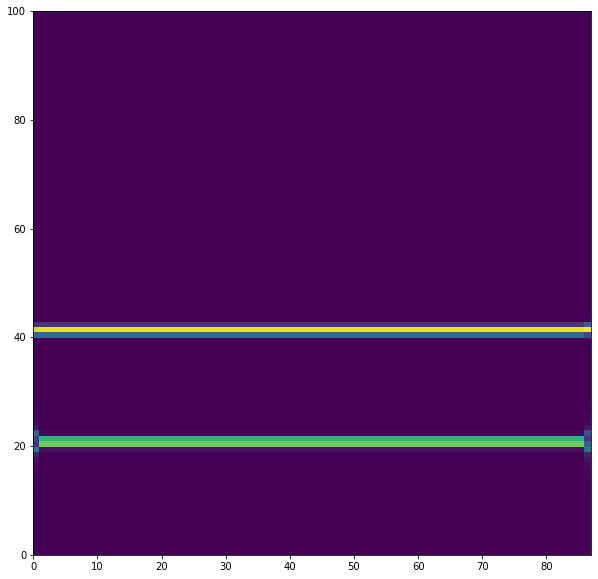

In [70]:
plt.figure(figsize=(10,10))
plt.pcolormesh(features[:100])